In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
customer_data=pd.read_csv("/content/Mall_Customers.csv")

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
#choosing annual income and spending score
X=customer_data.iloc[:,[3,4]].values

In [11]:
#WCSS-within clusters sum of squares
#choosing no of clusters
wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)


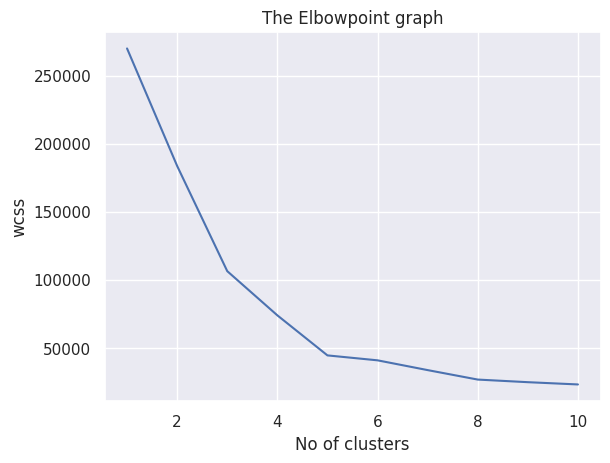

In [12]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbowpoint graph")
plt.xlabel("No of clusters")
plt.ylabel("wcss")
plt.show()

there ate 2 elbow points one at 3 and one at 5, but we choose 5 because after 5 there is no significant drop

In [13]:
#Training K means clustering model
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)


In [14]:
#return a label for each data point based on their cluster
Y=kmeans.fit_predict(x)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


5 clusters are 0,1,2,3,4


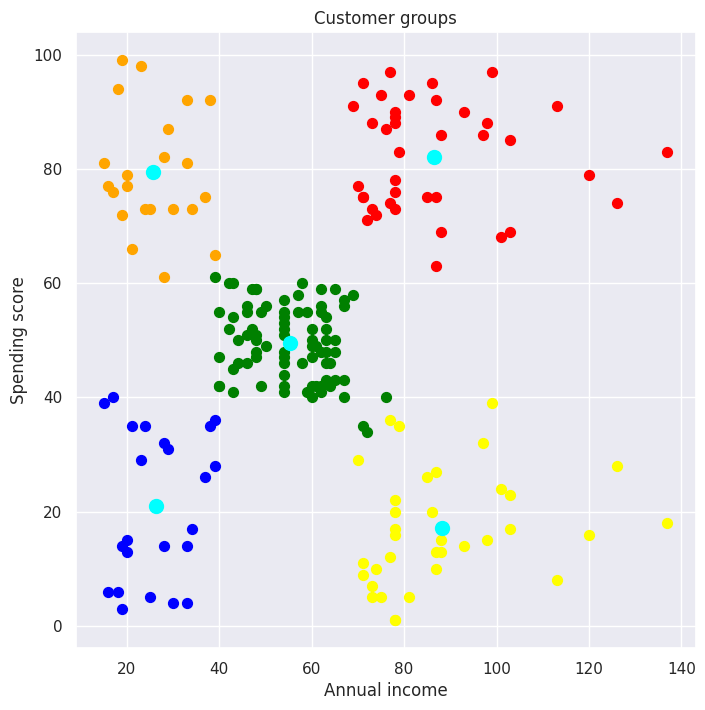

In [15]:
#visualizing all the clusters
#plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0],x[Y==0,1],s=50,c='green',label='cluster1')
plt.scatter(x[Y==1,0],x[Y==1,1],s=50,c='red',label='cluster2')
plt.scatter(x[Y==2,0],x[Y==2,1],s=50,c='yellow',label='cluster3')
plt.scatter(x[Y==3,0],x[Y==3,1],s=50,c='blue',label='cluster4')
plt.scatter(x[Y==4,0],x[Y==4,1],s=50,c='orange',label='cluster5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroids')
plt.title("Customer groups")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.show()